In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets.widgets import interact, FloatSlider

%matplotlib inline

pi = np.math.pi

def setLabels(lX, lY):
    plt.xlabel(lX)
    plt.ylabel(lY)
    
plt.rcParams['font.size'] = 40
plt.rcParams['figure.figsize'] = (40, 10)
plt.rcParams['lines.linewidth'] = 2.0

# Aufgabe 4: Abtastung im Frequenzbereich
Gegeben sei das Signal
\begin{align}
    x(t) = \begin{cases}
        \sin(t): & t \in \left[-\frac{\pi}{2},\frac{\pi}{2}\right] \\
        0: & \text{sonst.}
        \end{cases}
\end{align}


#### Graph des Signals im Zeitbereich

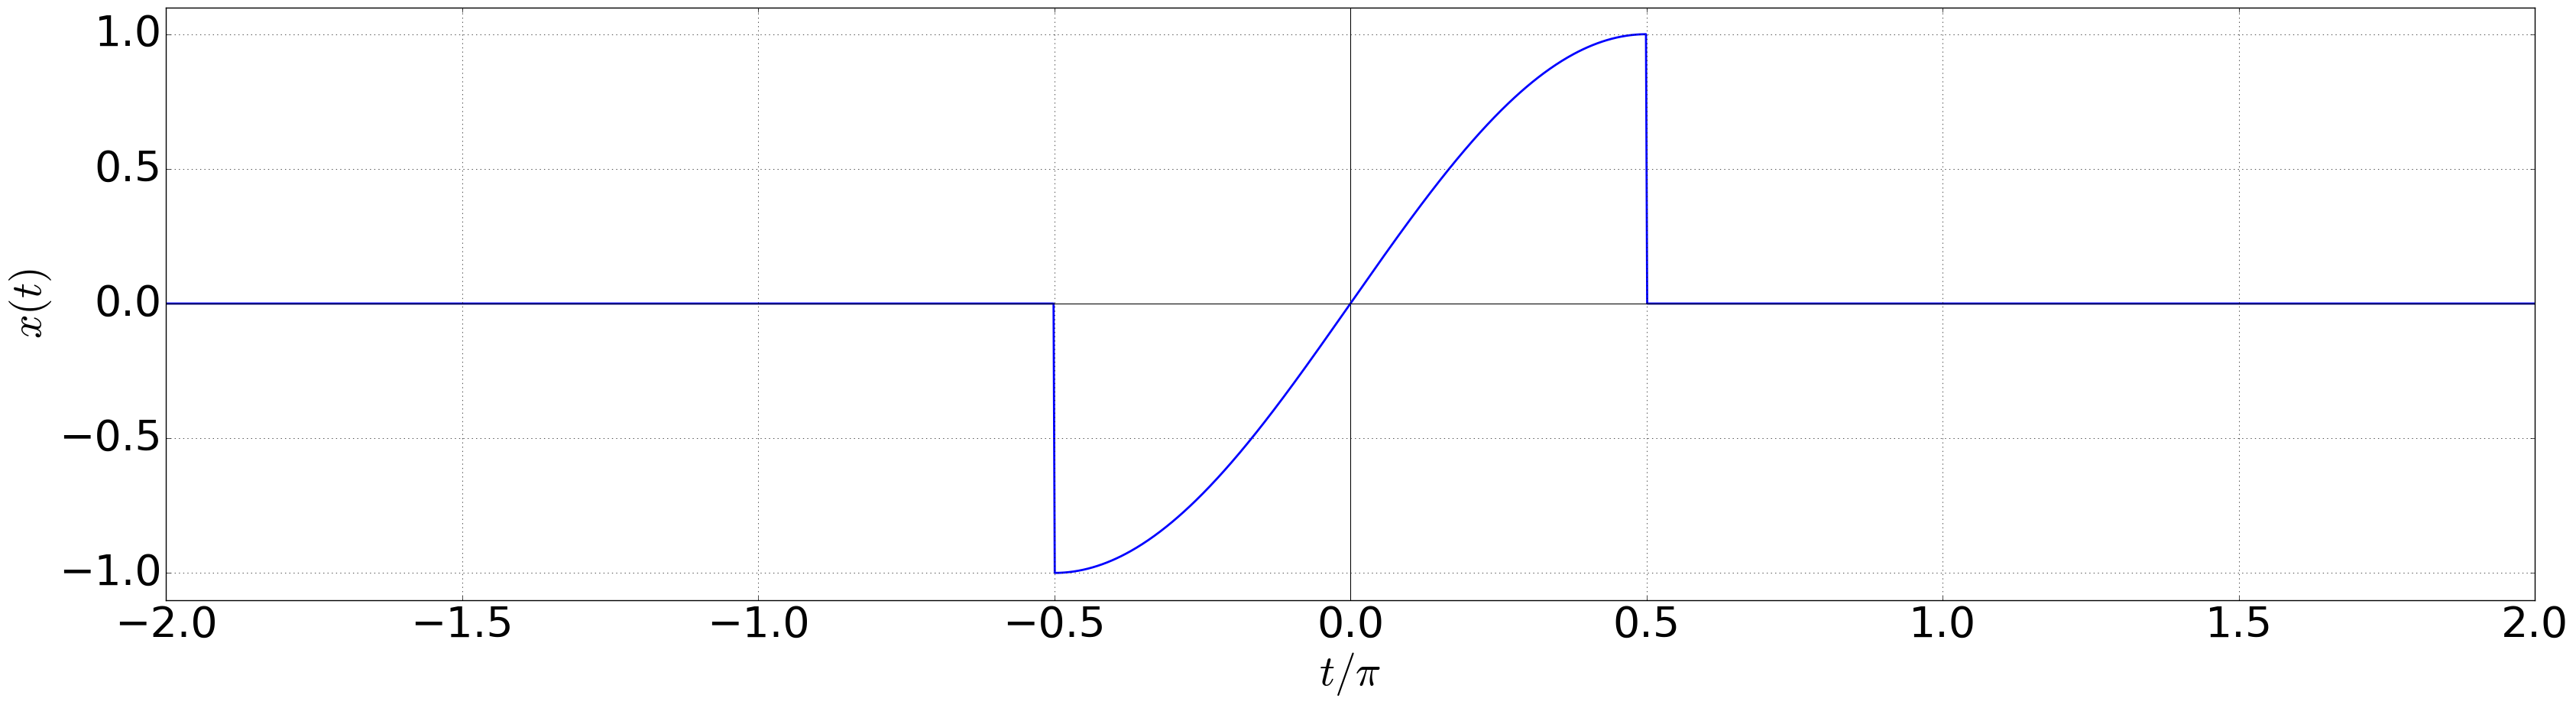

In [3]:
N = 3*1000
T = 2
T_d = 6*pi
samples_per_second = N/T_d

t = np.linspace(-T_d/2, T_d/2, N)
x = np.sin(t)*(np.abs(t) < pi/2)

plt.grid()
plt.xlim((-2, 2))
plt.ylim((1.1*min(x), 1.1*max(x)))
plt.axvline(lw=0.75, c='k')
plt.plot(t/pi, x, 'b-')
plt.axhline(lw=0.75, c='k')
setLabels(r'$t/\pi$', r'$x(t)$')

## 4.1
Handelt es sich bei $x(t)$ um ein Energie- oder ein Leistungssignal?

#### Mit Anschauung:
Das Signal $x(t)$ ist ein Energiesignal, da es beschränkt und von begrenzter Dauer ist.  

#### Mit Rechnung:

\begin{align}
    x(t) &= \sin(t)\cdot \mathrm{rect}\left(\frac{t}{\pi}\right)&& \\
    \Rightarrow E_{x} &= \int_{-\infty}^{\infty}\left|x(t)\right|^2 \mathrm{d}t&&\\
         &= \int_{-\pi/2}^{\pi/2} \sin^2(t) \mathrm{d}t && \left|\  \sin^2(x) = \frac{1}{2} - \frac{1}{2}\cos(2x) \right.\\
         &= \frac{1}{2}\int_{-\pi/2}^{\pi/2} 1 - \cos(2t)  \mathrm{d}t && \\
         &= \left[\frac{t}{2} - \frac{\sin(2t)}{4}\right]_{-\pi/2}^{\pi/2} = \frac{\pi}{2} < \infty!&&
\end{align}

Da die Energie endlich ist, ist das Signal ein Energiesignal.

## 4.2
Berechnen sie die Fouriertransformierte $X(j\omega)$ des Signals $x(t)$.

\begin{align}
    x(t) &= \sin(t) \cdot \mathrm{rect} \left( \frac{t}{\pi} \right) \\
    \Rightarrow X(j\omega) &= \frac{1}{2\pi} \mathcal{F} \left\{ \sin(t) \right\} \ast \mathcal{F}\left\{ \mathrm{rect}\left( \frac{t}{\pi} \right) \right\} \\
    &= \frac{1}{2\pi} \left( j\pi\left(\delta(\omega + 1) - \delta(\omega - 1) \right) \right) \ast \left(\pi \mathrm{si}\left(\frac{\pi \omega}{2} \right) \right) \\
        &= \frac{j\pi}{2} \left( \mathrm{si}\left(\frac{\pi (\omega +1)}{2} \right) - \mathrm{si}\left(\frac{\pi (\omega -1)}{2} \right) \right)
\end{align}

### Die Fouriertransformierte $X(j\omega)$ wird nun im Frequenzbereich mit $\omega_0$ abgetastet.

## 4.3
Geben sie das durch die Abtastung enstehende frequenzdiskrete Spektrum $X_p(j\omega)$ an.

Die Abtastung lässt sich als Multiplikation mit einem Dirac-Kamm im Frequenzbereich schreiben:

\begin{align}
    X_p(j\omega) &= X(j\omega) \cdot \sum_{k = -\infty}^{\infty} \delta\left(\omega - k\omega_0\right) \\
    &= \sum_{k = -\infty}^{\infty} \frac{j\pi}{2} \left( \mathrm{si}\left(\frac{\pi (\omega +1)}{2} \right) - \mathrm{si}\left(\frac{\pi (\omega -1)}{2} \right)  \right) \delta\left(\omega - k\omega_0\right) \\
     &= \sum_{k = -\infty}^{\infty} \frac{j\pi}{2} \left( \mathrm{si}\left(\frac{\pi (k\omega_0 +1)}{2} \right) - \mathrm{si}\left(\frac{\pi (k\omega_0 -1)}{2} \right)  \right) \delta\left(\omega - k\omega_0\right)
\end{align}


#### Graph der Spektren $X(j\omega)$ und $X_p(j\omega)$:

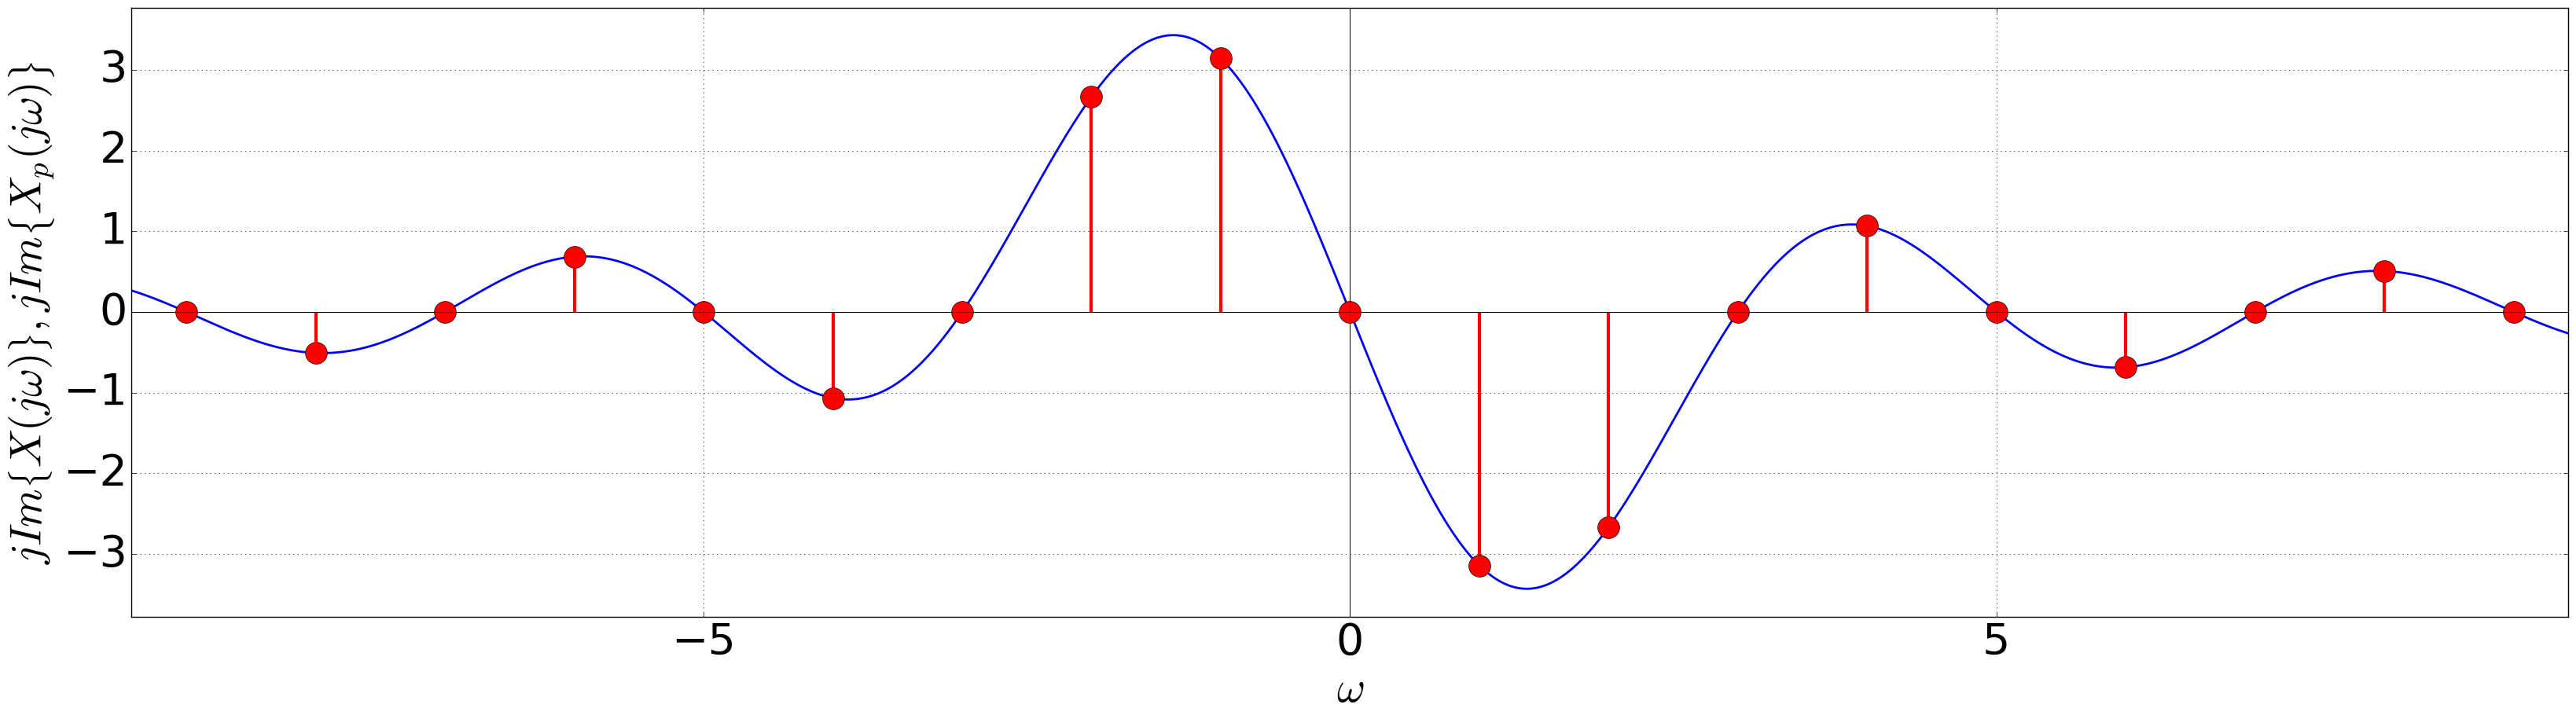

In [4]:
N_w = 2*1200
w = np.linspace(-12, 12, N_w)
X = 1j*pi*(np.sinc((w + 1)/2) - np.sinc((w - 1)/2))
    
@interact(omega_0=FloatSlider(min=0.5, max=4, step=0.25, value=1))
def plotSpectra(omega_0):
    omega_max_idx = int(12/omega_0)*omega_0
    omega_p = np.arange(-omega_max_idx, omega_max_idx, omega_0)
    X_p = 1j*pi*(np.sinc((omega_p + 1)/2) - np.sinc((omega_p - 1)/2))

    plt.axvline(lw=0.75, c='k')
    plt.plot(w, np.imag(X), 'b-')
    plt.plot(omega_p, np.imag(X_p), 'ro', ms=20)
    plt.vlines(omega_p, 0, np.imag(X_p), 'r', lw=3)
    plt.axhline(lw=0.75, c='k')
    setLabels(r'$\omega$', r'$jIm\left\{X(j\omega)\right\}, jIm\left\{X_p(j\omega)\right\}$')

    plt.xlim((-3*pi, 3*pi))
    plt.ylim((1.1*min(np.imag(X)), 1.1*max(np.imag(X))))
    plt.grid(True)

## 4.4
Bestimmen sie die inverse Fouriertransformierte $x_p(t)$ des Spektrums $X_p(j\omega)$.

Mit Tabelle und $\omega_0 = \frac{2\pi}{T_0}$ folgt:

\begin{align}
    \mathcal{F} \left\{ \sum_{k=-\infty}^{\infty} \delta\left(t - kT_0\right) \right\} = \underbrace{\frac{2\pi}{T_0}}_{=\omega_0} \sum_{k=-\infty}^{\infty} \delta\left(\omega - k\frac{2\pi}{T_0} \right) \\
    \Rightarrow \mathcal{F}^{-1} \left\{ \sum_{k=-\infty}^{\infty} \delta\left(\omega - k\omega_0 \right) \right\} = \frac{1}{\omega_0} \sum_{k=-\infty}^{\infty} \delta\left(t - k\frac{2\pi}{\omega_0}\right)
\end{align}

Die Multiplikation entspricht wegen des Faltungstheorems einer Faltung im Zeitbereich:

\begin{align}
x_p(t) &= \mathcal{F}^{-1}\left\{X(j\omega) \sum_{k=-\infty}^{\infty} \delta\left(\omega - k\omega_0 \right) \right\} \\
&= x(t) \ast \frac{1}{\omega_0} \sum_{k=-\infty}^{\infty} \delta\left(t - k\frac{2\pi}{\omega_0}\right) \\
 &= \frac{1}{\omega_0} \sum_{k=-\infty}^{\infty} x\left(t - k\frac{2\pi}{\omega_0}\right) \\
 &= \frac{1}{\omega_0} \sum_{k=-\infty}^{\infty} sin\left(t - k\frac{2\pi}{\omega_0}\right) \cdot \mathrm{rect}\left(\frac{t - k\frac{2\pi}{\omega_0}}{\pi}\right)
\end{align}

Durch die Abtastung im Frequenzbereich wird das Zeitsignal also periodisch wiederholt mit der Periodendauer $T_0 = \frac{2\pi}{\omega_0}$.

## 4.5
Skizzieren Sie $x_p(t)$ im Bereich $t \in \left[-2\pi, 2\pi\right]$ für $\omega_0 = 1$.

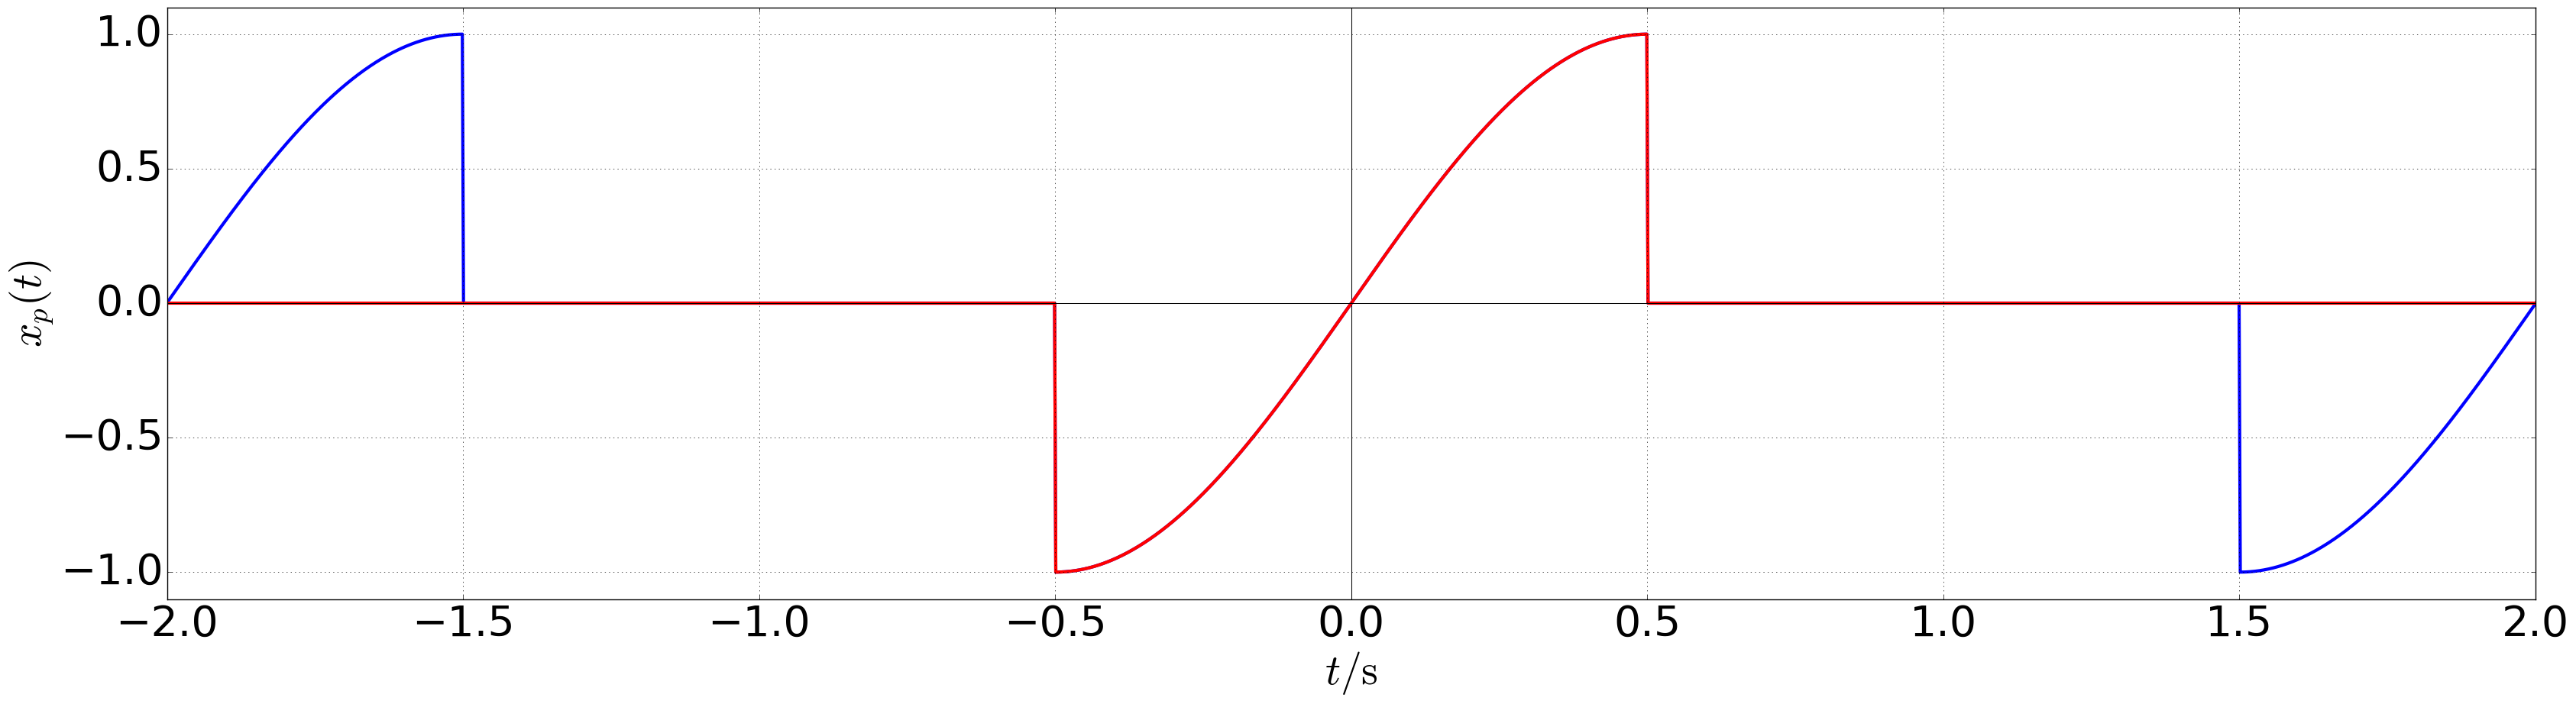

In [5]:
@interact(omega_0=FloatSlider(min=0.5, max=4, step=0.25, value=1))
def plot_periodic(omega_0):
    x_p = np.copy(x)
    # symmetrically add periodic repetitions
    for shift in np.arange(2*pi/omega_0, 2*pi+ 2*pi/omega_0, 2*pi/omega_0):
        x_p += np.roll(x, int(shift*samples_per_second))
        x_p += np.roll(x, -int(shift*samples_per_second))
        
    plt.axvline(lw=0.75, c='k')
    plt.plot(t/pi, x_p/omega_0, 'b-', lw=3)
    plt.plot(t/pi, x/omega_0, 'r-', lw=3)
    plt.axhline(lw=0.75, c='k')
    setLabels(r'$t/\rm{s}$', r'$x_p(t)$')
    plt.xlim((-2, 2))
    plt.ylim((1.1*min(x), 1.1*max(x)))
    plt.grid(True)

## 4.6
Welche Bedingung muss erfüllt sein, damit $x(t)$ *fehlerfrei* aus $x_p(t)$ zurückgewonnen werden kann?

Zur fehlerfreien Rekonstruktion dürfen sich die periodischen Wiederholungen von $x(t)$ in $x_p(t)$ nicht überlappen.
Da $x(t)$ die zeitliche Dauer $T = \pi$ besitzt, ist dies gewährleistet, wenn
\begin{align}
    T_0 = \frac{2\pi}{\omega_0} &\geq \pi = T \\
    \Rightarrow \omega_0 &\leq 2
\end{align}
Dies lässt sich auch durch den interaktiven Plot in 4.5) erkennen.

## 4.7
Zeigen sie, wie aus $x_p(t)$ fehlerfrei das ursprüngliche Signal zurückgewonnen werden kann.

Sofern die Bedingung aus 4.6) eingehalten wird, kann die Rekonstruktion durch Multiplikation mit einer Rechteck-Fensterfunktion im Zeitbereich geschehen. Dazu muss auch die Skalierung mit $\frac{1}{\omega_0}$ rückgängig gemacht werden:

\begin{align}
    x(t) &= x_p(t) \cdot \omega_0 \mathrm{rect}\left( \frac{\omega_0 t}{2 \pi} \right) \\
       &=  \mathrm{rect}\left( \frac{\omega_0 t}{2 \pi} \right) \left( \sum_{k=-\infty}^{\infty} x \left(t - k\frac{2\pi}{\omega_0}\right) \right)
\end{align}

## Zusatz: Hintergründe
Die hier beispielhaft vorgeführten Auswirkungen der Abtastung im Frequenzbereich treten auch in der Praxis auf: Bei der Umsetzung von Signalverarbeitungsverfahren auf Digitalrechnern kann die Frequenzachse nicht als kontinuierlich behandelt werden, sondern es muss auch hier &ndash; analog zur Abtastung im Zeitbereich &ndash; eine Diskretisierung erfolgen.  
Bei der Diskretisierung der Zeitachse wird das Spektrum periodisch wiederholt. Wegen des Dualitätstheorems wird bei der Abtastung im Frequenzbereich das Signal im Zeitbereich ebenfalls periodisch wiederholt. Dieser Effekt ist bereits durch die **Fourierreihen** vertraut: Mit diskreten Frequenzen können nur periodische Signale dargestellt werden.  
Ein typisches Beispiel für ein zeit- und frequenzdiskretes Signalverarbeitungsverfahren ist die **DFT**, welche auch die Umsetzung schneller Filterverfahren erlaubt, indem statt einer rechenaufwändigen Faltung im Zeitbereich eine frequenzweise Multiplikation im Frequenzbereich durchgeführt wird. Bei diesen Verfahren muss die künstlich durch die **DFT** eingebaute Periodizität des Zeitsignals unbedingt berücksichtigt werden, da das Ergebnis der Filterung sonst fehlerhaft ist.